# Behavioural cloning project

In [85]:
# Configure matlab to show graphics in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [86]:
# Change to 'data' when training on a GPU
PATH_TO_DATA = 'data/sample'

In [87]:
# Shape of the image
input_shape = (160, 320, 3)

In [88]:
def img_folder(data_folder):
    return '{}/IMG'.format(data_folder)

def path_driving_log(data_folder):
    return '{}/driving_log.csv'.format(data_folder)

In [89]:
datasets = ['train', 'test', 'valid']

In [90]:
def get_driving_log_dataframe(data_folder):
    driving_log_df = pd.read_csv(path_driving_log(data_folder))
    return driving_log_df

In [91]:
path_to_folders = dict(zip(datasets, map(lambda folder: '{0}/{1}'.format(PATH_TO_DATA, folder), datasets)))

In [92]:
path_to_folders

{'test': 'data/sample/test',
 'train': 'data/sample/train',
 'valid': 'data/sample/valid'}

In [123]:
from scipy.ndimage import imread
from os import listdir
from sklearn.utils import shuffle

def image_label_generator(data_folder, batch_size=2):
    driving_log_df = get_driving_log_dataframe(data_folder)
    number_of_examples = len(driving_log_df)
    print(number_of_examples)
    
    image_columns = ['center', 'left', 'right']
    
    X_train = []
    y_train = []
    index_in_batch = 0
    batch_number = 0
    
    for image_column in image_columns:
        image_series = driving_log_df[image_column]
        steering_series = driving_log_df['steering']
        for offset in range(0, number_of_examples, batch_size):
            X_train = []
            y_train = []
        
            for j in range(offset, offset + batch_size):
                image_filename = image_series[j].lstrip().rstrip()
                image = imread('{0}/{1}'.format(data_folder, image_filename))
                label = steering_series[j]
                X_train.append(image)
                y_train.append(label)
                X_train, y_train = shuffle(X_train, y_train)
                
            yield np.array(X_train), np.array(y_train)

In [127]:
sample_X, sample_y = next(image_label_generator(path_to_folders['train']))

12


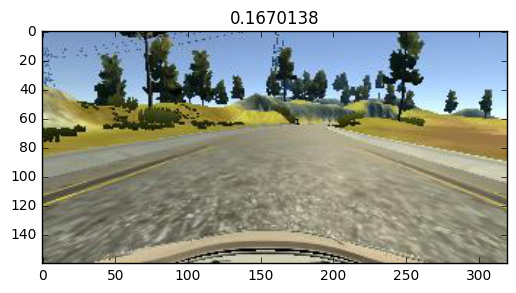

In [130]:
plt.title(sample_y[0])
plt.imshow(sample_X[0])

In [52]:
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import Flatten

In [53]:
model = Sequential()

In [54]:
model.add(Convolution2D(3, 1, 1, 
                          input_shape=input_shape, 
                          border_mode='same', 
                          activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(24, 5, 5,
                       activation='relu',
                       subsample=(2, 2)))
model.add(BatchNormalization())
model.add(Convolution2D(36, 5, 5,
                       activation='relu',
                       subsample=(2, 2)))
model.add(BatchNormalization())
model.add(Convolution2D(48, 5, 5,
                       activation='relu',
                       subsample=(2, 2)))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3,
                       activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [55]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 160, 320, 3)   12          convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 160, 320, 3)   12          convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 78, 158, 24)   1824        batchnormalization_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_2 (BatchNorma (None, 78, 158, 24)   96          convolution2d_2[0][0]            
___________________________________________________________________________________________

In [56]:
model.compile('adam', 'mse')

In [57]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")